# Práctica 5. Clasificación Lineal. Perceptron II.

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Ejercicio 1: Implementación del método Perceptron

In [370]:
class Perceptron:
    def __init__(self, max_iter=3000, mezclar=True, eta0=1.0) -> None:
        self.max_iter = max_iter
        self.mezclar = mezclar
        self.eta0 = eta0

    def ajustar(self, X: np.ndarray, y:np.array) -> None:
        self.peso_umbral_ = 0
        self.pesos_ = np.zeros(X.shape[1])
        y = self._encode(y)
    
        if self.mezclar:
            X, y = self._shuffle(X, y)
        
        iter = 0
        modified = False
        while(modified != True and iter < self.max_iter):
            for idx, val in enumerate(X):
                f = self.peso_umbral_ + np.dot(val, self.pesos_)
                if y[idx] == 0 and f < 0:
                    self.peso_umbral_ += self.eta0
                    self.pesos_ += self.eta0 * val
                    modified = True
                elif y[idx] == 1 and f >= 0:
                    self.peso_umbral_ -= self.eta0
                    self.pesos_ -= self.eta0 * val
                    modified = True
            iter += 1

    def _shuffle(self, X, y):
        Xy = np.column_stack((X, y))
        np.random.shuffle(Xy)
        return (Xy[:, :-1], Xy[:, -1])

    def _encode(self, y):
        self.encoder = preprocessing.LabelEncoder()
        return self.encoder.fit_transform(y)

    def predecir(self, X: np.ndarray) -> np.array:
        prediction = np.where(np.dot(X, self.pesos_) + self.peso_umbral_ >= 0.0, 1, 0)
        return self.encoder.inverse_transform(prediction)
    

### Ejercicio 2: Clasificación con el método Perceptron implementado

##### Generar un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y versicolor del conjunto de datos original.

In [371]:
df_original = pd.read_csv('iris_pca_2d.csv')

In [372]:
df = df_original[(df_original['clase'] == 'setosa') | (df_original['clase'] == 'versicolor')]

##### Dividir el conjunto anterior en entrenamiento (70%) y test (30%)

In [373]:
train_df, test_df = train_test_split(df, train_size= 0.7, random_state=False)

##### Entrenar un clasificador lineal utilizando la clase Perceptron

In [374]:
clf = Perceptron()
clf.ajustar(train_df[['pc1','pc2']], train_df['clase'])

##### Mostrar un gráfico con las muestras de entrenamiento de las dos clases en rojo y azul, y la superficie de decisión en negro

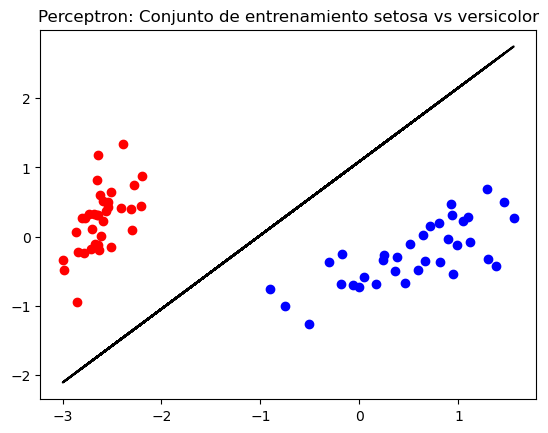

In [375]:
coefs = clf.pesos_
intercept = clf.peso_umbral_
x = train_df.iloc[:, :-1]
plt.scatter(train_df[train_df['clase'] == 'setosa']['pc1'], train_df[train_df['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(train_df[train_df['clase'] == 'versicolor']['pc1'], train_df[train_df['clase'] == 'versicolor']['pc2'], color='blue')
plt.plot(x, (-(coefs[0]/coefs[1])*x) -(intercept/coefs[1]), color='black')
plt.title('Perceptron: Conjunto de entrenamiento setosa vs versicolor')
plt.show()

##### Mostrar un gráfico con las muestras de test de las dos clases en rojo y azul, y la superficie de decisión en negro.

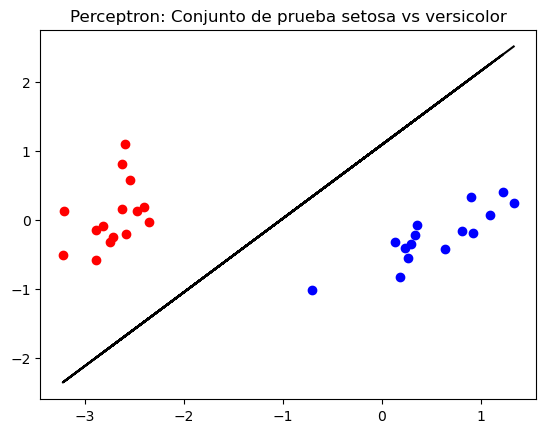

In [376]:
coefs = clf.pesos_
intercept = clf.peso_umbral_
x = test_df.iloc[:, :-1]
plt.scatter(test_df[test_df['clase'] == 'setosa']['pc1'], test_df[test_df['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(test_df[test_df['clase'] == 'versicolor']['pc1'], test_df[test_df['clase'] == 'versicolor']['pc2'], color='blue')
plt.plot(x, (-(coefs[0]/coefs[1])*x) -(intercept/coefs[1]), color='black')
plt.title('Perceptron: Conjunto de prueba setosa vs versicolor')
plt.show()

##### Explicar los resultados obtenidos de acuerdo a las gráficas (separación de la superficie de las muestras, muestras mal clasificadas, ...)


En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar setosas y vesicolores es bastante acertado, la separación con la superficie de decisión es considerable exceptuando una muestra en la primera gráfica que se encuentra próxima. En cuanto a la clasificación de las muestras ha sido bastante acertada, no ha clasificado mal ninguna muestra.

##### Generamos un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y virginica del conjunto de datos original y repetimos los pasos 2-6.

In [377]:
df_setosa_virginica = df_original[(df_original['clase'] == 'setosa') | (df_original['clase'] == 'virginica')]

##### Dividir el conjunto anterior en entrenamiento (70%) y test (30%)

In [378]:
train_df_setvir, test_df_setvir = train_test_split(df_setosa_virginica, train_size= 0.7, random_state=False)

##### Entrenar un clasificador lineal utilizando la clase Perceptron

In [379]:
clf_setvir = Perceptron()
clf_setvir.ajustar(train_df_setvir[['pc1','pc2']], train_df_setvir['clase'])

##### Mostrar un gráfico con las muestras de entrenamiento de las dos clases en rojo y azul, y la superficie de decisión en negro

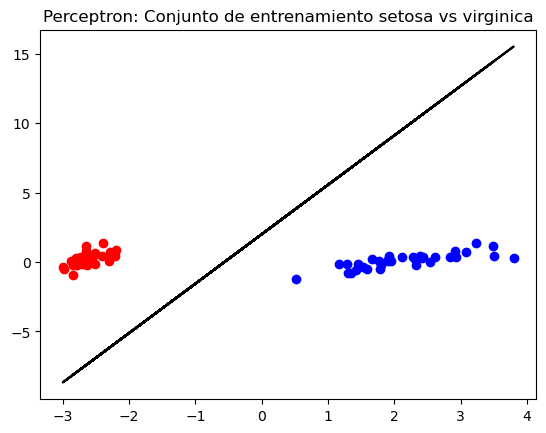

In [380]:
coefs_setvir = clf_setvir.pesos_
intercept_setvir = clf_setvir.peso_umbral_
x = train_df_setvir.iloc[:, :-1]
plt.scatter(train_df_setvir[train_df_setvir['clase'] == 'setosa']['pc1'], train_df_setvir[train_df_setvir['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(train_df_setvir[train_df_setvir['clase'] == 'virginica']['pc1'], train_df_setvir[train_df_setvir['clase'] == 'virginica']['pc2'], color='blue')
plt.plot(x, (-(coefs_setvir[0]/coefs_setvir[1])*x) -(intercept_setvir/coefs_setvir[1]), color='black')
plt.title('Perceptron: Conjunto de entrenamiento setosa vs virginica')
plt.show()

##### Mostrar un gráfico con las muestras de test de las dos clases en rojo y azul, y la superficie de decisión en negro.

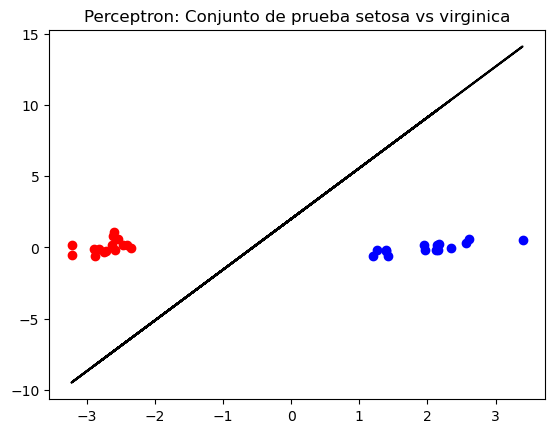

In [381]:
coefs_setvir = clf_setvir.pesos_
intercept_setvir = clf_setvir.peso_umbral_
x = test_df_setvir.iloc[:, :-1]
plt.scatter(test_df_setvir[test_df_setvir['clase'] == 'setosa']['pc1'], test_df_setvir[test_df_setvir['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(test_df_setvir[test_df_setvir['clase'] == 'virginica']['pc1'], test_df_setvir[test_df_setvir['clase'] == 'virginica']['pc2'], color='blue')
plt.plot(x, (-(coefs_setvir[0]/coefs_setvir[1])*x) -(intercept_setvir/coefs_setvir[1]), color='black')
plt.title('Perceptron: Conjunto de prueba setosa vs virginica')
plt.show()

##### Explicar los resultados obtenidos de acuerdo a las gráficas (separación de la superficie de las muestras, muestras mal clasificadas, ...)

En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar setosas y virginicas es bastante acertado, la separación con la superficie de decisión es considerable. En cuanto a la clasificación de las muestras de test ha sido bastante acertada, no ha clasificado mal ninguna muestra.

##### Generamos un conjunto de datos que contenga solo las muestras pertenecientes a las clases versicolor y virginica del conjunto de datos original y repetimos los pasos 2-6.

In [382]:
df_versicolor_virginica = df_original[(df_original['clase'] == 'versicolor') | (df_original['clase'] == 'virginica')]

##### Dividir el conjunto anterior en entrenamiento (70%) y test (30%)

In [383]:
train_df_vervir, test_df_vervir = train_test_split(df_versicolor_virginica, train_size= 0.7, random_state=False)

##### Entrenar un clasificador lineal utilizando la clase Perceptron

In [384]:
clf_vervir = Perceptron()
clf_vervir.ajustar(train_df_vervir[['pc1','pc2']], train_df_vervir['clase'])

##### Mostrar un gráfico con las muestras de entrenamiento de las dos clases en rojo y azul, y la superficie de decisión en negro

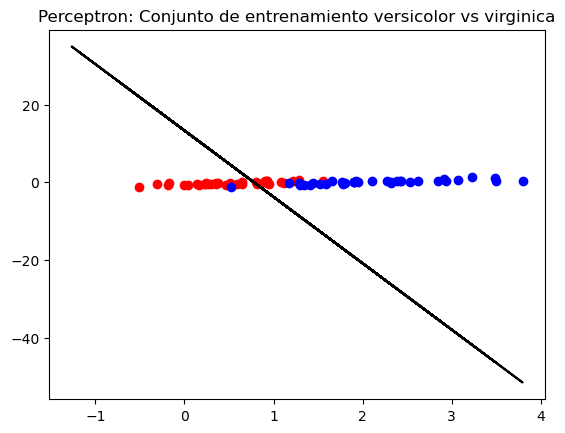

In [385]:
coefs_vervir = clf_vervir.pesos_
intercept_vervir = clf_vervir.peso_umbral_
x = train_df_vervir.iloc[:, :-1]
plt.scatter(train_df_vervir[train_df_vervir['clase'] == 'versicolor']['pc1'], train_df_vervir[train_df_vervir['clase'] == 'versicolor']['pc2'], color='red')
plt.scatter(train_df_vervir[train_df_vervir['clase'] == 'virginica']['pc1'], train_df_vervir[train_df_vervir['clase'] == 'virginica']['pc2'], color='blue')
plt.plot(x, (-(coefs_vervir[0]/coefs_vervir[1])*x) -(intercept_vervir/coefs_vervir[1]), color='black')
plt.title('Perceptron: Conjunto de entrenamiento versicolor vs virginica')
plt.show()

##### Mostrar un gráfico con las muestras de test de las dos clases en rojo y azul, y la superficie de decisión en negro.

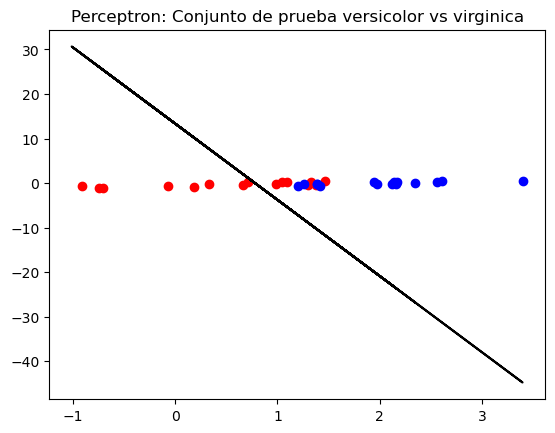

In [386]:
coefs_vervir = clf_vervir.pesos_
intercept_vervir = clf_vervir.peso_umbral_
x = test_df_vervir.iloc[:, :-1]
plt.scatter(test_df_vervir[test_df_vervir['clase'] == 'versicolor']['pc1'], test_df_vervir[test_df_vervir['clase'] == 'versicolor']['pc2'], color='red')
plt.scatter(test_df_vervir[test_df_vervir['clase'] == 'virginica']['pc1'], test_df_vervir[test_df_vervir['clase'] == 'virginica']['pc2'], color='blue')
plt.plot(x, (-(coefs_vervir[0]/coefs_vervir[1])*x) -(intercept_vervir/coefs_vervir[1]), color='black')
plt.title('Perceptron: Conjunto de prueba versicolor vs virginica')
plt.show()

##### Explicar los resultados obtenidos de acuerdo a las gráficas (separación de la superficie de las muestras, muestras mal clasificadas, ...)

En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar versicolores y virginicas no es muy acertado, la separación con la superficie de decisión es bastante poca para algunas muestras. En cuanto a la clasificación de las muestras no ha sido muy buena porque ha clasificado algunas muestras en el lado contrario de la recta.